### Pandas

In [1]:
import pandas as pd
names = ['john','anne','mary']          # List
df = pd.DataFrame(data=names)
df

,0
0,john
1,anne
2,mary


In [2]:
names = ['john','anne','mary']          # List
emails = ['john@mit.edu','anne@mit.edu','mary@mit.edu'] #dictionary
courses = [1,2,3]
contacts = {'Name': names,
            'Email': emails,
            'Course': courses}
df = pd.DataFrame(data=contacts, index = [1, 2, 3])
df

,Name,Email,Course
1,john,john@mit.edu,1
2,anne,anne@mit.edu,2
3,mary,mary@mit.edu,3


In [3]:
# rows and columns are Series - we can operate on them 
# get rows or add a row
df.loc[1]
#df.iloc[1:4]
#df.loc[4] = ['joe','joe@mit.edu',5]


Name              john
Email     john@mit.edu
Course               1
Name: 1, dtype: object

In [4]:
# get columns or add a column


In [5]:
# operations on columns
df['Price'] = df['Course']*10
df

,Name,Email,Course,Price
1,john,john@mit.edu,1,10
2,anne,anne@mit.edu,2,20
3,mary,mary@mit.edu,3,30


In [ ]:
# operations on rows
df.loc[5] = df.loc[1] + df.loc[2]
df

### Dealing with NaN

In [6]:
import pandas as pd
import numpy as np
cols = list('ABCD')
np.random.seed(seed=1)
myArr = np.random.ranf(size=(5,4))
myArr[2,3] = np.NaN
myArr[3,2] = np.NaN
df = pd.DataFrame(data=myArr, columns=cols)
df.fillna(value = 0.0)
df

,A,B,C,D
0,0.417022,0.720324,0.000114,0.302333
1,0.146756,0.092339,0.186260,0.345561
2,0.396767,0.538817,0.419195,NaN
3,0.204452,0.878117,NaN,0.670468
4,0.417305,0.558690,0.140387,0.198101


In [7]:
### Should we drop the whole Column or Row or Both
df.fillna(value = 0.0,inplace = True)
#df.dropna(axis = 1,inplace = True)   # drops a row -  axis=1 drops a column
df

,A,B,C,D
0,0.417022,0.720324,0.000114,0.302333
1,0.146756,0.092339,0.186260,0.345561
2,0.396767,0.538817,0.419195,0.000000
3,0.204452,0.878117,0.000000,0.670468
4,0.417305,0.558690,0.140387,0.198101


In [8]:

import pandas as pd
import numpy as np
data = pd.read_csv('houseSmallData.csv')
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# In Class Exercise - list out the columns with the most NaN's (list top 5)
data = pd.read_csv('testData.csv')


In [11]:
# replace values of NaN with zeroes
#df.fillna(value = 0.0)
X=data.drop(['SalePrice'], axis = 1)
numeric = data.select_dtypes(include=[np.number])
numeric.head()
data.corr()['SalePrice']


Unnamed: 0       0.169908
Id               0.169908
MSSubClass      -0.075538
LotFrontage      0.348097
LotArea          0.458530
OverallQual      0.786003
OverallCond     -0.048835
YearBuilt        0.389623
YearRemodAdd     0.459630
MasVnrArea       0.374830
BsmtFinSF1       0.504946
BsmtFinSF2       0.012698
BsmtUnfSF       -0.004520
TotalBsmtSF      0.548819
1stFlrSF         0.540889
2ndFlrSF         0.401720
LowQualFinSF     0.106511
GrLivArea        0.744012
BsmtFullBath     0.382605
BsmtHalfBath    -0.018271
FullBath         0.421878
HalfBath         0.283732
BedroomAbvGr     0.022901
KitchenAbvGr    -0.148677
TotRmsAbvGrd     0.600238
Fireplaces       0.505403
GarageYrBlt      0.395083
GarageCars       0.662996
GarageArea       0.694061
WoodDeckSF       0.278904
OpenPorchSF      0.426016
EnclosedPorch   -0.098568
3SsnPorch       -0.027394
ScreenPorch      0.405428
PoolArea         0.055527
MiscVal         -0.114435
MoSold           0.001486
YrSold           0.106782
SalePrice   

In [ ]:
# remember inplace !!!

### Catagorical Data

In [60]:
import pandas as pd
import numpy as np
cols = list('ABCD')
np.random.seed(seed=1)
myArr = np.random.ranf(size=(5,4))
df = pd.DataFrame(data=myArr, columns=cols)
df['Fruit'] = ['apple', 'pear', 'orange', 'pear','apple']
one_hot = pd.get_dummies(df['Fruit'])
df = df.join(one_hot)
df.drop('Fruit',axis = 1, inplace=True)
df

,A,B,C,D,apple,orange,pear
0,0.417022,0.720324,0.000114,0.302333,1,0,0
1,0.146756,0.092339,0.186260,0.345561,0,0,1
2,0.396767,0.538817,0.419195,0.685220,0,1,0
3,0.204452,0.878117,0.027388,0.670468,0,0,1
4,0.417305,0.558690,0.140387,0.198101,1,0,0


### Correlation of Data in DataFrame

In [ ]:
df.corr()

In [ ]:
df['A'].corr(df['B'])

### In Class Exercise  - Predict Price based on Features
####  Get to know this data
#### 1) Find what "features" are most correlated with price

In [52]:
import pandas as pd
import numpy as np
data = pd.read_csv('houseSmallData.csv')
data.shape

(100, 82)

<img src = 'XY.png'>

In [58]:
# find NaN and clean
nulls = data.isnull().sum().sort_values(ascending=False)
nulls

PoolQC          100
Alley            94
MiscFeature      91
Fence            77
FireplaceQu      54
               ... 
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
Unnamed: 0        0
Length: 82, dtype: int64

In [57]:
#drop NaNs cols axis 

In [ ]:
# check for NaNs

In [66]:
# select only numeric cols
numeric = data.select_dtypes(include=[np.number]).dropna(axis  = 1)
numeric
df = numeric
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.000000,0.235294,0.140812,0.571429,0.5,0.939394,0.898305,0.175785,0.375532,...,0.000000,0.236434,0.000000,0.0,0.0,NaN,0.000000,0.090909,0.50,0.422539
1,0.010101,0.010101,0.000000,0.164438,0.428571,1.0,0.666667,0.440678,0.000000,0.520213,...,0.347725,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.363636,0.25,0.354832
2,0.020202,0.020202,0.235294,0.198336,0.571429,0.5,0.919192,0.881356,0.145291,0.258511,...,0.000000,0.162791,0.000000,0.0,0.0,NaN,0.000000,0.727273,0.50,0.460153
3,0.030303,0.030303,0.294118,0.163410,0.571429,0.5,0.050505,0.338983,0.000000,0.114894,...,0.000000,0.135659,1.000000,0.0,0.0,NaN,0.000000,0.090909,0.00,0.250765
4,0.040404,0.040404,0.235294,0.260175,0.714286,0.5,0.909091,0.847458,0.313901,0.348404,...,0.224037,0.325581,0.000000,0.0,0.0,NaN,0.000000,1.000000,0.50,0.526606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.959596,0.959596,0.235294,0.167827,0.428571,1.0,0.838384,0.728814,0.060987,0.164894,...,0.270712,0.244186,0.000000,0.0,0.0,NaN,0.685714,0.272727,0.75,0.363609
96,0.969697,0.969697,0.000000,0.178079,0.571429,0.5,0.898990,0.830508,0.164126,0.618085,...,0.184364,0.112403,0.000000,0.0,0.0,NaN,0.000000,0.636364,0.00,0.436331
97,0.979798,0.979798,0.000000,0.191577,0.142857,0.5,0.555556,0.254237,0.043049,0.276596,...,0.140023,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.363636,0.25,0.137294
98,0.989899,0.989899,0.058824,0.185496,0.285714,0.5,0.101010,0.000000,0.000000,0.057447,...,0.000000,0.000000,0.283088,0.0,0.0,NaN,0.571429,0.363636,1.00,0.107829


In [74]:
# find cols most correlated with SalePrice
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending = False)[0:6].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

In [77]:
# select X training data and Y dependent
X = numeric[cols]
Y = numeric['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


In [78]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8309859964337734


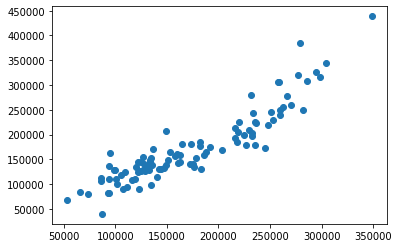

In [80]:
import matplotlib.pyplot as plt
plt.scatter(predictions, Y)

In [ ]:
# build Linear Regression Model

<img src='beta.png' width= 500>

In [ ]:
# find NaNs and clean
nulls = data.isnull()
data[nulls]

In [ ]:
train.dropna(axis=1,inplace=True)
sum(train.isnull().sum() != 0)
train.shape

In [ ]:
corr = train.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6]

In [ ]:
cols.index

In [ ]:
X = train[cols.index]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

In [ ]:
plt.scatter(predictions, Y, color = 'r')

In [ ]:
# Repeat this but normalize the numeric data before training
df = numeric
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df